# **INTRODUCTION TO `pandas`**
---
 <br>
 
- Copyright (c) Lukas Gonon, 2024. All rights reserved

- Author: Lukas Gonon <l.gonon@imperial.ac.uk>

- Platform: Tested on Windows 10 with Python 3.9

 **Origins**
 
 `pandas` was originally developed by [Wes McKinney](https://wesmckinney.com) while at AQR Capital in 2007-2010.

# Introduction to DataFrames

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline

## Create a Dataframe with dates

We start by creating series of Gaussian distributed values.

In [49]:
N = 10000 ## size of the dataframe

In [50]:
xx = np.random.standard_normal((N, 5))
df = pd.DataFrame(xx)

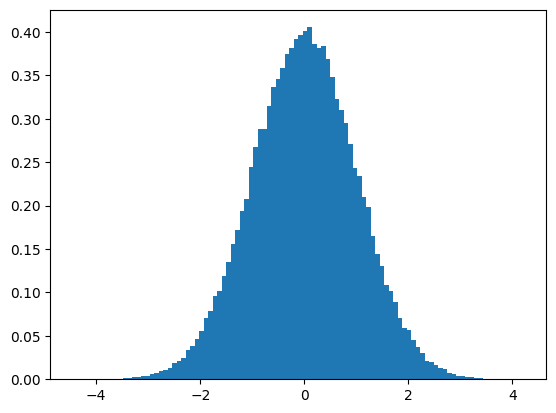

In [51]:
gfg = np.random.standard_normal(100000) 
  
plt.hist(gfg, bins = 100, density = True) 
plt.show()

In [52]:
gfg.shape

(100000,)

In [53]:
type(xx)

numpy.ndarray

In [54]:
type(df)

pandas.core.frame.DataFrame

In [55]:
df.head() ## Print the top five rows

,0,1,2,3,4
0,0.866025,0.925336,-0.114947,-1.708910,1.222564
1,0.258199,0.705033,-0.150114,0.009903,-0.265726
2,-0.243725,-1.430789,-0.050171,0.407021,1.175152
3,-1.455638,-0.269427,-0.680992,-0.393823,-0.153909
4,-0.910345,-0.420740,1.625086,1.732408,0.384801


In [56]:
df.tail() ## Print the bottom five rows

,0,1,2,3,4
9995,-0.116930,0.652332,-1.348522,-0.708024,1.588975
9996,-0.003774,0.303499,0.517194,-0.931835,0.107440
9997,-0.642405,2.075321,0.947850,-1.249773,0.088603
9998,0.787233,0.329961,1.308956,0.888550,0.086753
9999,-0.111954,-0.778405,-0.415627,-0.294097,0.129484


In [57]:
df.columns = ["Series 1", "Series 2", "Series 3", "Series 4", "Series 5"]
## Or more concisely:
#df.columns = ["Series %s" % i  for i in range(1,6)]
df.head()

,Series 1,Series 2,Series 3,Series 4,Series 5
0,0.866025,0.925336,-0.114947,-1.708910,1.222564
1,0.258199,0.705033,-0.150114,0.009903,-0.265726
2,-0.243725,-1.430789,-0.050171,0.407021,1.175152
3,-1.455638,-0.269427,-0.680992,-0.393823,-0.153909
4,-0.910345,-0.420740,1.625086,1.732408,0.384801


Note that the index (first column on the left) has no real meaning here. 
However, in practice, thinking of each of the columns as a time series, it may represent dates. 
We re-index the whole dataframe with this in mind.

#### Specifying a start date

In [58]:
startYear = '2018'
startMonth = '01'
startDay = '01'
startDate = startYear + "-" + startMonth + "-" + startDay ## string concatenation
print("Start date: ", startDate)

Start date:  2018-01-01


In [59]:
dates = pd.date_range(startDate, periods=N, freq="D")
df.index = dates
df.index.name = 'Date'
df.head()

,Series 1,Series 2,Series 3,Series 4,Series 5
Date,,,,,
2018-01-01,0.866025,0.925336,-0.114947,-1.708910,1.222564
2018-01-02,0.258199,0.705033,-0.150114,0.009903,-0.265726
2018-01-03,-0.243725,-1.430789,-0.050171,0.407021,1.175152
2018-01-04,-1.455638,-0.269427,-0.680992,-0.393823,-0.153909
2018-01-05,-0.910345,-0.420740,1.625086,1.732408,0.384801


## Basic dataframe manipulations

In [60]:
df.keys()

Index(['Series 1', 'Series 2', 'Series 3', 'Series 4', 'Series 5'], dtype='object')

An Index is a `pandas` class for an immutable sequence, which is the basis for axes.

In [61]:
print('Names of columns:', [d for d in df.keys().values])
## similarly df.columns

Names of columns: ['Series 1', 'Series 2', 'Series 3', 'Series 4', 'Series 5']


Overview of the data

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10000 entries, 2018-01-01 to 2045-05-18
Freq: D
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Series 1  10000 non-null  float64
 1   Series 2  10000 non-null  float64
 2   Series 3  10000 non-null  float64
 3   Series 4  10000 non-null  float64
 4   Series 5  10000 non-null  float64
dtypes: float64(5)
memory usage: 468.8 KB


Basic statistics

In [63]:
df.describe()

,Series 1,Series 2,Series 3,Series 4,Series 5
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.015124,-0.005116,0.017874,-0.004129,-0.001161
std,1.005925,0.995086,1.004485,1.001426,0.995712
min,-3.912949,-3.630109,-3.788950,-3.809916,-3.576636
25%,-0.663859,-0.679933,-0.655908,-0.670665,-0.678915
50%,0.010674,-0.005605,0.009479,-0.011959,0.004716
75%,0.697244,0.668970,0.706923,0.673785,0.676028
max,3.537137,4.027948,3.815473,3.674372,3.743161


## Accessing elements from a dataframe

A  DataFrame may be indexed like an array, specifying the row and column number using .iloc (index location).
The location can be called either by the index number or by its name.

In [64]:
df.head()

,Series 1,Series 2,Series 3,Series 4,Series 5
Date,,,,,
2018-01-01,0.866025,0.925336,-0.114947,-1.708910,1.222564
2018-01-02,0.258199,0.705033,-0.150114,0.009903,-0.265726
2018-01-03,-0.243725,-1.430789,-0.050171,0.407021,1.175152
2018-01-04,-1.455638,-0.269427,-0.680992,-0.393823,-0.153909
2018-01-05,-0.910345,-0.420740,1.625086,1.732408,0.384801


In [65]:
print("First row, second column: ", df.iloc[0, 1], " or ", df.loc[startDate, 'Series 2'])

First row, second column:  0.9253355623729559  or  0.9253355623729559


In [66]:
myRow = df.iloc[2,:]
print(myRow)
print("Type: ", type(myRow))

Series 1   -0.243725
Series 2   -1.430789
Series 3   -0.050171
Series 4    0.407021
Series 5    1.175152
Name: 2018-01-03 00:00:00, dtype: float64
Type:  <class 'pandas.core.series.Series'>


Equivalently:

In [67]:
myRow = df.loc['2018-01-03']
print(myRow, type(myRow))

Series 1   -0.243725
Series 2   -1.430789
Series 3   -0.050171
Series 4    0.407021
Series 5    1.175152
Name: 2018-01-03 00:00:00, dtype: float64 <class 'pandas.core.series.Series'>


In [68]:
print("Accessing elements by slicing over columns: ")
print(df.iloc[0, 1:3])
print(type(df.iloc[0, 1:3]))

Accessing elements by slicing over columns: 
Series 2    0.925336
Series 3   -0.114947
Name: 2018-01-01 00:00:00, dtype: float64
<class 'pandas.core.series.Series'>


In [69]:
print("Accessing elements by slicing over rows: ")
print(df.iloc[10:14, 1])
print(type(df.iloc[10:14, 1]))

Accessing elements by slicing over rows: 
Date
2018-01-11   -1.417901
2018-01-12   -0.884851
2018-01-13    1.207460
2018-01-14    1.092270
Freq: D, Name: Series 2, dtype: float64
<class 'pandas.core.series.Series'>


In [70]:
print("Accessing elements by slicing over boths: ")
print(df.iloc[10:14, 1:3])
print(type(df.iloc[10:14, 1:3]))

Accessing elements by slicing over boths: 
            Series 2  Series 3
Date                          
2018-01-11 -1.417901  1.647689
2018-01-12 -0.884851 -0.669435
2018-01-13  1.207460 -0.248425
2018-01-14  1.092270 -0.894121
<class 'pandas.core.frame.DataFrame'>


Question: What are the types of the following objects:
- df.iloc[2]
- df.iloc[2].values
- [d for d in df.iloc[2]]

In [71]:
print(type(df.iloc[2]))
print(type(df.iloc[2].values))
print(type([d for d in df.iloc[2]]))

<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>
<class 'list'>


In [72]:
print(df.iloc[1])

Series 1    0.258199
Series 2    0.705033
Series 3   -0.150114
Series 4    0.009903
Series 5   -0.265726
Name: 2018-01-02 00:00:00, dtype: float64


### `.at` and `.iat`

These two commands are very similar to `.loc` and `.iloc`, and are actually faster, but slicing is not permitted.

In [73]:
%timeit df.iloc[10, 2]
%timeit df.iat[10, 2]

32.8 µs ± 604 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
28.6 µs ± 171 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [74]:
try:
    df.iat[10, 2:4]
except :
    print("Error, you need to use the function 'iloc'\n",df.iloc[10,2:4])


Error, you need to use the function 'iloc'
 Series 3    1.647689
Series 4   -0.769282
Name: 2018-01-11 00:00:00, dtype: float64


### Extract elements with conditions

In [75]:
mySeriesName = "Series 2"
df[df[mySeriesName] > 3.4]

,Series 1,Series 2,Series 3,Series 4,Series 5
Date,,,,,
2028-06-22,-0.966717,3.466200,0.048213,0.108555,1.806710
2030-06-19,-1.879723,4.027948,-0.089568,-1.600754,-0.411104
2036-09-03,-0.282010,3.524751,1.912818,0.255497,-0.941894


Note that the series `df` has not been modified. Only a copy has been printed!!

In [76]:
mySeries =  df[mySeriesName][df[mySeriesName] > 3.4]
mySeries

Date
2028-06-22    3.466200
2030-06-19    4.027948
2036-09-03    3.524751
Name: Series 2, dtype: float64

We can return the series only as a list:

In [77]:
print(mySeries.values)

[3.4662004  4.02794802 3.52475122]


### User-defined functions

In [78]:
df = df
df.head()

,Series 1,Series 2,Series 3,Series 4,Series 5
Date,,,,,
2018-01-01,0.866025,0.925336,-0.114947,-1.708910,1.222564
2018-01-02,0.258199,0.705033,-0.150114,0.009903,-0.265726
2018-01-03,-0.243725,-1.430789,-0.050171,0.407021,1.175152
2018-01-04,-1.455638,-0.269427,-0.680992,-0.393823,-0.153909
2018-01-05,-0.910345,-0.420740,1.625086,1.732408,0.384801


Here, the original dataframe has been modified!

In [79]:
def myFunction(x, param):
    return x + param

df[mySeriesName] = df[mySeriesName].apply(myFunction, args=(10,))
df.head()

,Series 1,Series 2,Series 3,Series 4,Series 5
Date,,,,,
2018-01-01,0.866025,10.925336,-0.114947,-1.708910,1.222564
2018-01-02,0.258199,10.705033,-0.150114,0.009903,-0.265726
2018-01-03,-0.243725,8.569211,-0.050171,0.407021,1.175152
2018-01-04,-1.455638,9.730573,-0.680992,-0.393823,-0.153909
2018-01-05,-0.910345,9.579260,1.625086,1.732408,0.384801


## Numpy on dataframe

This is where the power of the DataFrame comes into the picture, namely that operations need to be performed element by element, 
but apply to a whole series (column) at once.

In [80]:
myIndex = input("Series index")

Series index1


In [81]:
ser = 'Series ' + myIndex
print('Maximum on the first Series:', df[ser].max())
print('Date (index) where this maximum is attained:', df[ser].argmax()) ## deprecated
print('Date where this maximum is attained:', df[ser].idxmax(), df.index[df[ser].argmax()])
print('Mean of the first series:', df[ser].mean())

Maximum on the first Series: 3.5371367687919846
Date (index) where this maximum is attained: 2334
Date where this maximum is attained: 2024-05-23 00:00:00 2024-05-23 00:00:00
Mean of the first series: 0.015124009041799858


We can also obtain general results about the whole dataframe / each series in the dataframe:

In [82]:
df.mean()

Series 1    0.015124
Series 2    9.994884
Series 3    0.017874
Series 4   -0.004129
Series 5   -0.001161
dtype: float64

## Plotting Dataframes

##### Plot all the time series

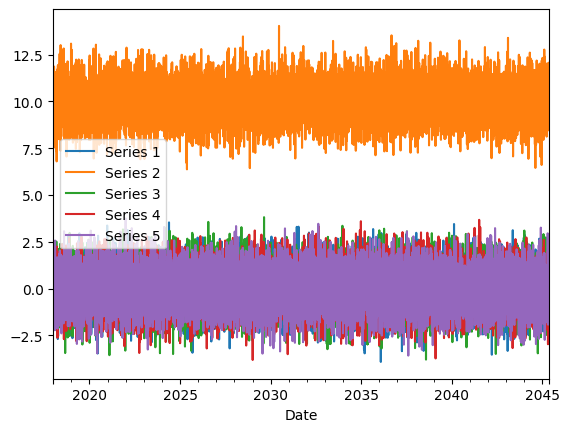

In [83]:
df.plot();

**WHAT IS WRONG ABOUT THE PLOT?**

##### Plot one column at a time

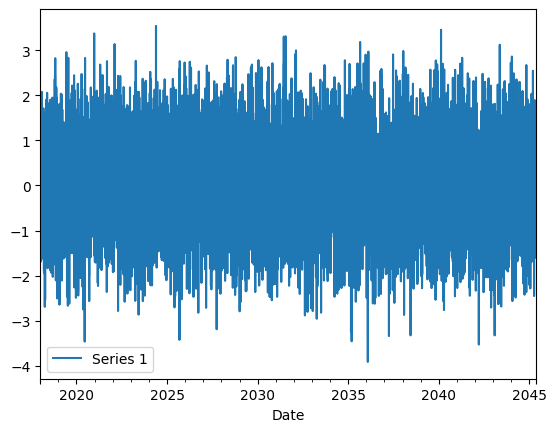

In [84]:
df[ser].plot(legend=ser);

##### Changing the type of plots

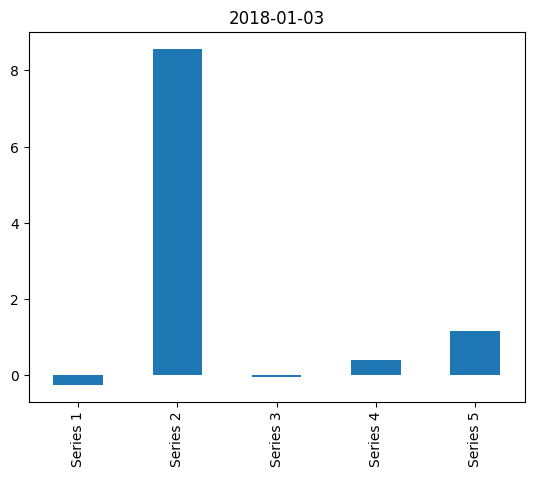

In [85]:
datePlot = '2018-01-03'
df.loc[datePlot].plot(kind='bar', title=datePlot); ## for one particular day

## Sorting DataFrames

In [90]:
print('Data sorted by ' + ser)
df.sort_values(by=ser).head()

Data sorted by Series 1


KeyError: 'Series 1'

*WARNING: the dataframe df itself has remained unchanged though...*

In [87]:
df.head()

,Series 1,Series 2,Series 3,Series 4,Series 5
Date,,,,,
2018-01-01,0.866025,10.925336,-0.114947,-1.708910,1.222564
2018-01-02,0.258199,10.705033,-0.150114,0.009903,-0.265726
2018-01-03,-0.243725,8.569211,-0.050171,0.407021,1.175152
2018-01-04,-1.455638,9.730573,-0.680992,-0.393823,-0.153909
2018-01-05,-0.910345,9.579260,1.625086,1.732408,0.384801


## Renaming columns

In [91]:
df.rename(columns={'Series 1': 'SPX', 
                   'Series 2': 'DAX', 
                   'Series 3': 'GOOGL', 
                   'Series 4': 'AAPL', 
                   'Series 5': 'VIX'}, inplace=True)
df.head()

,SPX,DAX,GOOGL,AAPL,VIX
Date,,,,,
2018-01-01,0.866025,10.925336,-0.114947,-1.708910,1.222564
2018-01-02,0.258199,10.705033,-0.150114,0.009903,-0.265726
2018-01-03,-0.243725,8.569211,-0.050171,0.407021,1.175152
2018-01-04,-1.455638,9.730573,-0.680992,-0.393823,-0.153909
2018-01-05,-0.910345,9.579260,1.625086,1.732408,0.384801


### A note on copies on slices....

In [92]:
df.head()

,SPX,DAX,GOOGL,AAPL,VIX
Date,,,,,
2018-01-01,0.866025,10.925336,-0.114947,-1.708910,1.222564
2018-01-02,0.258199,10.705033,-0.150114,0.009903,-0.265726
2018-01-03,-0.243725,8.569211,-0.050171,0.407021,1.175152
2018-01-04,-1.455638,9.730573,-0.680992,-0.393823,-0.153909
2018-01-05,-0.910345,9.579260,1.625086,1.732408,0.384801


In [93]:
val = df.iloc[1,0]
val

0.2581990717464044

In [94]:
df[df["SPX"] == val]["DAX"] = 0.
df

/var/folders/ly/3n9d71nx23qdhf4_l8q2bjcw0000gn/T/ipykernel_19552/3746132791.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df["SPX"] == val]["DAX"] = 0.


,SPX,DAX,GOOGL,AAPL,VIX
Date,,,,,
2018-01-01,0.866025,10.925336,-0.114947,-1.708910,1.222564
2018-01-02,0.258199,10.705033,-0.150114,0.009903,-0.265726
2018-01-03,-0.243725,8.569211,-0.050171,0.407021,1.175152
2018-01-04,-1.455638,9.730573,-0.680992,-0.393823,-0.153909
2018-01-05,-0.910345,9.579260,1.625086,1.732408,0.384801
...,...,...,...,...,...
2045-05-14,-0.116930,10.652332,-1.348522,-0.708024,1.588975
2045-05-15,-0.003774,10.303499,0.517194,-0.931835,0.107440
2045-05-16,-0.642405,12.075321,0.947850,-1.249773,0.088603


In [45]:
df.loc[df["SPX"] == val, "DAX"] = 0.
df

,SPX,DAX,GOOGL,AAPL,VIX
Date,,,,,
2018-01-01,0.049660,11.941187,0.802981,0.235741,1.144242
2018-01-02,0.457116,0.000000,1.414712,0.425312,0.750950
2018-01-03,0.240782,8.278694,-0.004673,-0.493800,1.471815
2018-01-04,1.325882,10.033274,-1.603097,0.083922,1.912226
2018-01-05,0.305973,10.763426,1.405838,-0.341296,1.961838
...,...,...,...,...,...
2045-05-14,-0.232333,11.059426,-0.232738,-1.035954,-0.559243
2045-05-15,-0.485683,9.777695,-0.697275,1.350898,-0.268245
2045-05-16,0.359143,11.660160,0.713920,-0.296892,-0.494753


# Working with real data

## Financial data from Yahoo Finance

In [98]:
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like
#import pandas_datareader as web
#from pandas_datareader import data as pdr
from datetime import datetime
import matplotlib.pylab as plt

In [154]:
ticker = "AAPL"
#aapl = pdr.DataReader(ticker, 'yahoo', '1980-01-01')
aapl = pd.read_csv("data/apple.csv")
aapl.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2000-01-03,4.017857,3.631696,3.745536,3.997768,133949200.0,2.677157
1,2000-01-04,3.950893,3.613839,3.866071,3.660714,128094400.0,2.451444
2,2000-01-05,3.948661,3.678571,3.705357,3.714286,194580400.0,2.487319
3,2000-01-06,3.821429,3.392857,3.790179,3.392857,191993200.0,2.272070
4,2000-01-07,3.607143,3.410714,3.446429,3.553571,115183600.0,2.379695


In [155]:
aapl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4771 entries, 0 to 4770
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4771 non-null   object 
 1   High       4771 non-null   float64
 2   Low        4771 non-null   float64
 3   Open       4771 non-null   float64
 4   Close      4771 non-null   float64
 5   Volume     4771 non-null   float64
 6   Adj Close  4771 non-null   float64
dtypes: float64(6), object(1)
memory usage: 261.0+ KB


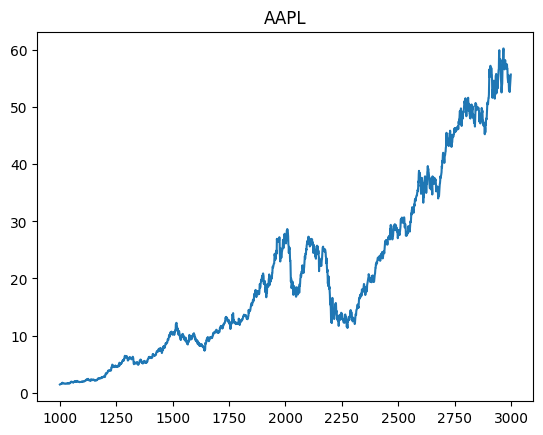

In [157]:
aapl[1000:3000]["Open"].plot(title=ticker)
#aapl["Close"].plot(title=ticker)
plt.show()

## Economics Data from FRED

In [102]:
from datetime import date
series_code = 'DGS10' # 10-year Treasury Rate
data_source = 'fred' # FED Economic Data Service
start = date(1962, 1, 1)
myData = pdr.DataReader(series_code, data_source, start)

NameError: name 'pdr' is not defined

In [ ]:
myData.head()

In [ ]:
myData = myData / 100.
series_name = '10-year Treasury'
myData = myData.rename(columns={series_code: series_name})
myData.plot(title=series_name)
plt.show() 

## Analysing real data

In [158]:
ticker = "^GSPC" ## S&P500 
spx = pd.read_csv("data/spx_daily.csv")
#pdr.DataReader(ticker, 'yahoo', '1980-01-01')
spx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5799 entries, 0 to 5798
Data columns (total 1 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   Date;Open;High;Low;Close;Adj Close;Volume  5799 non-null   object
dtypes: object(1)
memory usage: 45.4+ KB


In [159]:
spx.head()

,Date;Open;High;Low;Close;Adj Close;Volume
0,2000-01-03;148.25;148.25;143.875;145.4375;94.5...
1,2000-01-04;143.53125;144.0625;139.640625;139.7...
2,2000-01-05;139.9375;141.53125;137.25;140.0;91....
3,2000-01-06;139.625;141.5;137.75;137.75;89.5949...
4,2000-01-07;140.3125;145.75;140.0625;145.75;94....


In [160]:
spx['Close'].plot(figsize=(8, 5), grid=True);

KeyError: 'Close'

In [161]:
ticker = "^GSPC" ## S&P500 
spx = pd.read_csv("data/spx_daily.csv",delimiter=";")
#pdr.DataReader(ticker, 'yahoo', '1980-01-01')
spx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5799 entries, 0 to 5798
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5799 non-null   object 
 1   Open       5799 non-null   float64
 2   High       5799 non-null   float64
 3   Low        5799 non-null   float64
 4   Close      5799 non-null   float64
 5   Adj Close  5799 non-null   float64
 6   Volume     5799 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 317.3+ KB


In [162]:
spx.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-03,148.25000,148.25000,143.875000,145.4375,94.595108,8164300
1,2000-01-04,143.53125,144.06250,139.640625,139.7500,90.895828,8089800
2,2000-01-05,139.93750,141.53125,137.250000,140.0000,91.058418,12177900
3,2000-01-06,139.62500,141.50000,137.750000,137.7500,89.594955,6227200
4,2000-01-07,140.31250,145.75000,140.062500,145.7500,94.798302,8066500


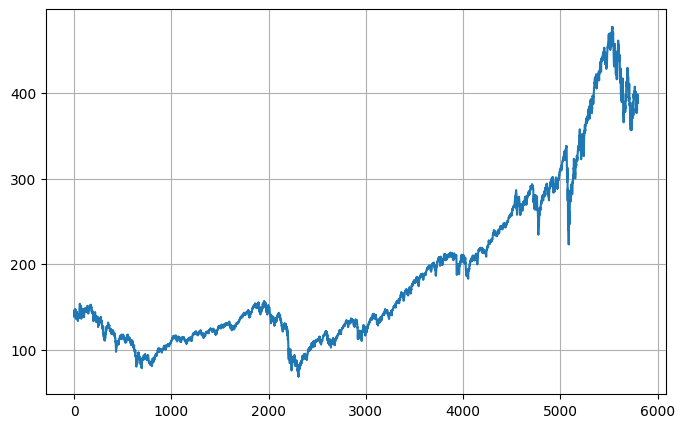

In [163]:
spx['Close'].plot(figsize=(8, 5), grid=True);

### A quick note on computation time -- computing daily returns

In [109]:
len(spx)

5799

In [110]:
%%time
spx['ReturnsLoop'] = 0.
for i in range(1, len(spx)):
    spx['ReturnsLoop'][i] = np.log(spx['Close'][i] / spx['Close'][i - 1])

<timed exec>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


CPU times: user 2.83 s, sys: 115 ms, total: 2.94 s
Wall time: 2.85 s


In [111]:
spx[['Close', 'ReturnsLoop']].head()

,Close,ReturnsLoop
0,145.4375,0.000000
1,139.7500,-0.039891
2,140.0000,0.001787
3,137.7500,-0.016202
4,145.7500,0.056452


In [112]:
%time spx['Returns'] = np.log(spx['Close'] / spx['Close'].shift(1))
spx[['Close', 'Returns']].head()

CPU times: user 1.68 ms, sys: 298 µs, total: 1.98 ms
Wall time: 1.85 ms


,Close,Returns
0,145.4375,NaN
1,139.7500,-0.039891
2,140.0000,0.001787
3,137.7500,-0.016202
4,145.7500,0.056452


In [113]:
del spx['ReturnsLoop']

In [114]:
spx.dropna()
spx.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Returns
0,2000-01-03,148.25000,148.25000,143.875000,145.4375,94.595108,8164300,NaN
1,2000-01-04,143.53125,144.06250,139.640625,139.7500,90.895828,8089800,-0.039891
2,2000-01-05,139.93750,141.53125,137.250000,140.0000,91.058418,12177900,0.001787
3,2000-01-06,139.62500,141.50000,137.750000,137.7500,89.594955,6227200,-0.016202
4,2000-01-07,140.31250,145.75000,140.062500,145.7500,94.798302,8066500,0.056452


In [115]:
val = spx.iloc[0,0]
val

'2000-01-03'

### Data analysis

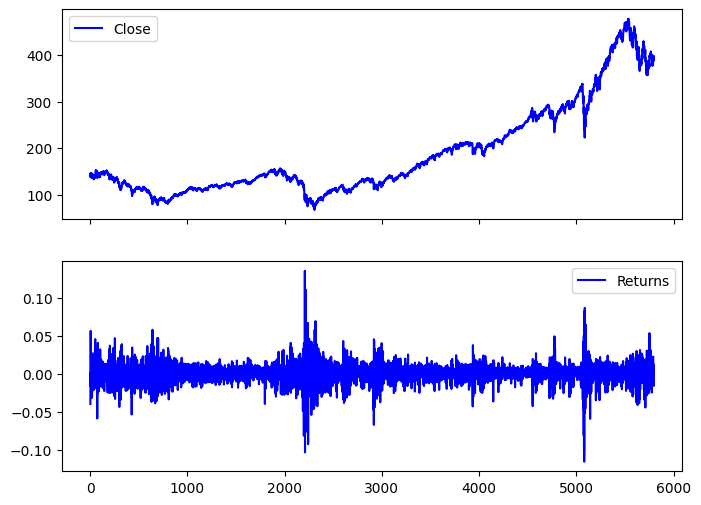

In [116]:
spx[['Close', 'Returns']].plot(subplots=True, style='b',figsize=(8, 6));

**Remarks:**
- Volatility clustering
- Leverage effect

### Moving averages

In [117]:
n1, n2 = 24, 252
MA1, MA2 = 'MA' + str(n1) + 'd', 'MA' + str(n2) + 'd'
spx[MA1] = spx['Close'].rolling(window=n1, center = False).mean()
spx[MA2] = spx['Close'].rolling(window=n2, center = False).mean()
spx.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,Returns,MA24d,MA252d
5794,2023-01-12,396.670013,398.489990,392.420013,396.959991,393.987244,90157700,0.003634,387.502082,406.517025
5795,2023-01-13,393.619995,399.100006,393.339996,398.500000,395.515717,63903900,0.003872,387.596249,406.229247
5796,2023-01-17,398.480011,400.230011,397.059998,397.769989,394.791168,62677300,-0.001834,387.783332,405.964326
5797,2023-01-18,399.010010,400.119995,391.279999,391.489990,388.558228,99632300,-0.015914,387.472497,405.673731
5798,2023-01-19,389.359985,391.079987,387.260010,388.640015,385.729584,86958900,-0.007306,386.917081,405.404485


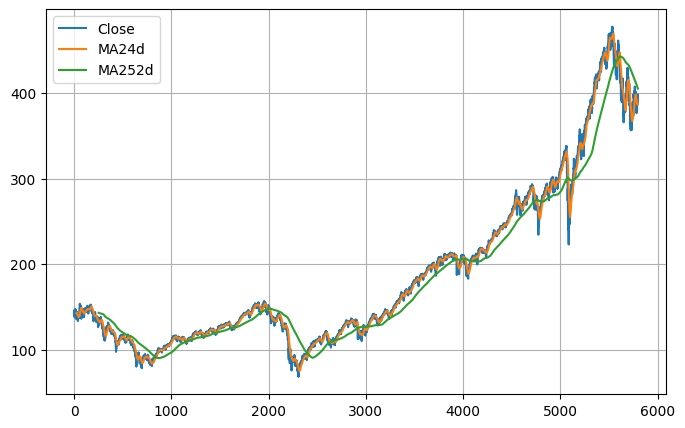

In [118]:
spx[['Close', MA1, MA2]].plot(figsize=(8, 5), grid=True);

In [119]:
spx['MovingReturnsVol'] = spx['Returns'].rolling(window=252).std() * np.sqrt(252.)

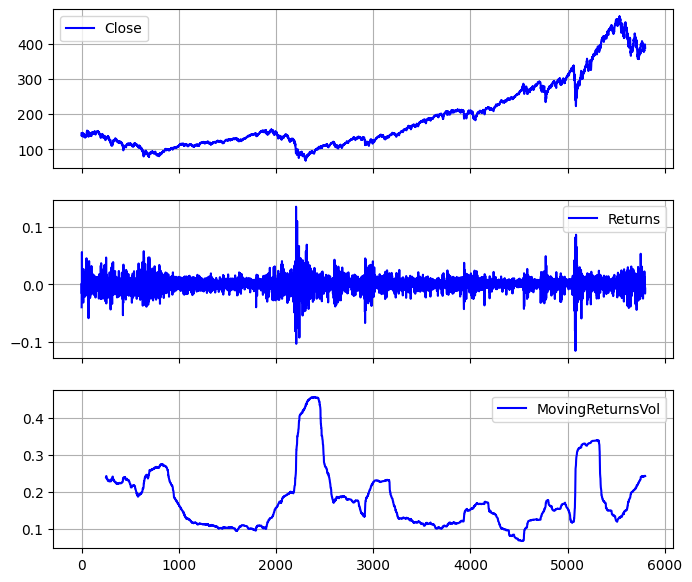

In [120]:
spx[['Close', 'Returns', 'MovingReturnsVol']].plot(subplots=True, style='b',figsize=(8, 7), grid=True);

# The `groupby` command

In [121]:
import pandas as pd

df = pd.read_csv('data/Class.csv')
df.head()

,Name,Grade,Nationality,Gender
0,John,81.791817,China,M
1,Joe,96.101421,UK,M
2,Jack,96.466640,France,F
3,Ben,93.981908,US,M
4,Cynthia,53.858965,Japan,M


In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         35 non-null     object 
 1   Grade        35 non-null     float64
 2   Nationality  35 non-null     object 
 3   Gender       35 non-null     object 
dtypes: float64(1), object(3)
memory usage: 1.2+ KB


In [123]:
df["Grade"].mean()

75.78772944914284

In [124]:
df["Grade"].sum()# / len(df.index)

2652.57053072

In [125]:
df.groupby(['Nationality']).agg({'Grade': 'mean'})

,Grade
Nationality,
Cambodia,73.970554
China,72.109283
France,73.727389
German,78.613666
Japan,71.400133
Korea,76.892591
UK,74.029734
US,85.262760
Vietnam,72.649608


In [126]:
df.groupby(['Nationality']).agg({'Grade': 'sum'})

,Grade
Nationality,
Cambodia,147.941108
China,576.874264
France,147.454778
German,157.227331
Japan,357.000665
Korea,153.785183
UK,370.148668
US,596.839317
Vietnam,145.299216


In [127]:
df.groupby(['Nationality', 'Gender']).agg({'Grade': 'sum'})#.sum()

Grade
Nationality Gender            
Cambodia    F        55.248696
            M        92.692412
China       F       127.833955
            M       449.040309
France      F       147.454778
German      F        68.975979
            M        88.251352
Japan       M       357.000665
Korea       M       153.785183
UK          F       274.047247
            M        96.101421
US          F       156.859866
            M       439.979451
Vietnam     F        66.581475
            M        78.717741

# Merge, join, concatenate data -- an example with the MTA database

NYC map: https://www.google.com/maps/place/New+York,+NY,+USA/@40.6976684,-74.2605634,10z/data=!3m1!4b1!4m5!3m4!1s0x89c24fa5d33f083b:0xc80b8f06e177fe62!8m2!3d40.7127753!4d-74.0059728


Data: http://web.mta.info/developers/turnstile.html



### Importing and looking at the data

In [128]:
import datetime as dt
import pandas as pd

In [129]:
url  = r'http://web.mta.info/developers/data/nyct/turnstile/turnstile_180825.txt'
df = pd.read_csv(url)#, index_col=0, header=0, parse_dates=True)

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197380 entries, 0 to 197379
Data columns (total 11 columns):
 #   Column                                                                Non-Null Count   Dtype 
---  ------                                                                --------------   ----- 
 0   C/A                                                                   197380 non-null  object
 1   UNIT                                                                  197380 non-null  object
 2   SCP                                                                   197380 non-null  object
 3   STATION                                                               197380 non-null  object
 4   LINENAME                                                              197380 non-null  object
 5   DIVISION                                                              197380 non-null  object
 6   DATE                                                                  197380 non-null  objec

In [131]:
df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/18/2018,00:00:00,REGULAR,6728354,2280604
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/18/2018,04:00:00,REGULAR,6728373,2280609
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/18/2018,08:00:00,REGULAR,6728388,2280634
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/18/2018,12:00:00,REGULAR,6728469,2280669
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/18/2018,16:00:00,REGULAR,6728665,2280681


In [132]:
#!pip install xlrd

In [133]:
url  = r'http://web.mta.info/developers/resources/nyct/turnstile/Remote-Booth-Station.xls'
infoStations = pd.read_excel(url)#, index_col=0, header=0, parse_dates=True)
infoStations.head()

,Remote,Booth,Station,Line Name,Division
0,R001,A060,WHITEHALL ST,R1,BMT
1,R001,A058,WHITEHALL ST,R1,BMT
2,R001,R101S,SOUTH FERRY,R1,IRT
3,R002,A077,FULTON ST,ACJZ2345,BMT
4,R002,A081,FULTON ST,ACJZ2345,BMT


### Cleaning the data

In [134]:
df['ENTRIES'].max()

2129780411

In [135]:
df['EXITS'].max()

KeyError: 'EXITS'

In [136]:
df.keys()

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES',
       'EXITS                                                               '],
      dtype='object')

In [137]:
df.columns = ['ca', 'unit', 'scp', 'station', 'linename', 'division', 'date','time', 'desc', 'entries','exits']

In [138]:
df['exits'].max()

2062568997

In [139]:
#df["date"] = pd.to_datetime(df["date"] + " " + df["time"])
df["date"] = pd.to_datetime(df["date"])
df.head()

,ca,unit,scp,station,linename,division,date,time,desc,entries,exits
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-08-18,00:00:00,REGULAR,6728354,2280604
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-08-18,04:00:00,REGULAR,6728373,2280609
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-08-18,08:00:00,REGULAR,6728388,2280634
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-08-18,12:00:00,REGULAR,6728469,2280669
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-08-18,16:00:00,REGULAR,6728665,2280681


### Counting daily traffic using `groupbby`

In [140]:
df_entries = df.groupby(['station','ca','unit','scp','date']).entries.max() - df.groupby(['station','ca','unit','scp','date']).entries.min()
df_exits = df.groupby(['station','ca','unit','scp','date']).exits.max() - df.groupby(['station','ca','unit','scp','date']).exits.min()
print("Types: ", type(df_entries), type(df_exits))

Types:  <class 'pandas.core.series.Series'> <class 'pandas.core.series.Series'>


In [141]:
df_entries

station    ca    unit  scp       date      
1 AV       H007  R248  00-00-00  2018-08-18    1759
                                 2018-08-19    1461
                                 2018-08-20    2704
                                 2018-08-21    3002
                                 2018-08-22    3033
                                               ... 
ZEREGA AV  R419  R326  00-05-01  2018-08-20       0
                                 2018-08-21       0
                                 2018-08-22       0
                                 2018-08-23       0
                                 2018-08-24       0
Name: entries, Length: 32559, dtype: int64

We are now going to merge `df_entries` and `df_exits`. However, they need to have the same index.
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html

In [142]:
df_entries_flat = df_entries.reset_index()
df_exits_flat = df_exits.reset_index()

df_traffic = pd.merge(df_entries_flat, df_exits_flat, how='outer')

df_traffic['day'] = df_traffic['date'].dt.day_name()
df_traffic['traffic'] = df_traffic['entries'] + df_traffic['exits']

In [143]:
df_traffic.head()

,station,ca,unit,scp,date,entries,exits,day,traffic
0,1 AV,H007,R248,00-00-00,2018-08-18,1759,2377,Saturday,4136
1,1 AV,H007,R248,00-00-00,2018-08-19,1461,2074,Sunday,3535
2,1 AV,H007,R248,00-00-00,2018-08-20,2704,3417,Monday,6121
3,1 AV,H007,R248,00-00-00,2018-08-21,3002,3488,Tuesday,6490
4,1 AV,H007,R248,00-00-00,2018-08-22,3033,3451,Wednesday,6484


In [144]:
df_traffic.describe()

,entries,exits,traffic
count,3.255900e+04,3.255900e+04,3.255900e+04
mean,5.585258e+04,6.098161e+04,1.168342e+05
std,8.218440e+06,1.011603e+07,1.828231e+07
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.170000e+02,1.220000e+02,5.010000e+02
50%,6.680000e+02,4.150000e+02,1.251000e+03
75%,1.312000e+03,9.395000e+02,2.286000e+03
max,1.448534e+09,1.821581e+09,3.270114e+09


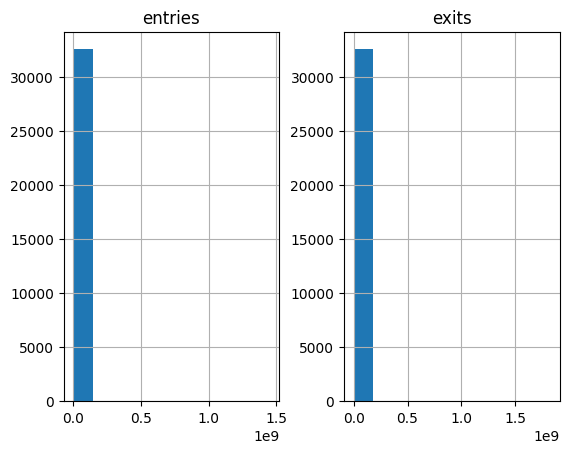

In [145]:
df_traffic[["entries", "exits"]].hist();

In [146]:
thresholdMax = 25000
df_traffic = df_traffic[df_traffic["traffic"] < thresholdMax]

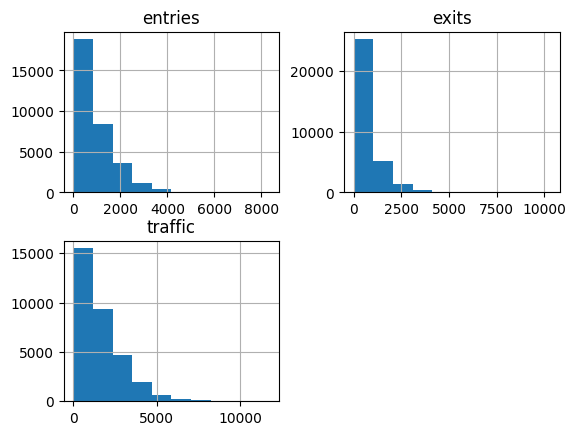

In [147]:
df_traffic[["entries", "exits", "traffic"]].hist();

Final steps

In [148]:
df_station = df_traffic.groupby(['station','date','day']).sum().reset_index()
df_station.head()

,station,date,day,entries,exits,traffic
0,1 AV,2018-08-18,Saturday,10105,11904,22009
1,1 AV,2018-08-19,Sunday,8349,10070,18419
2,1 AV,2018-08-20,Monday,14392,16478,30870
3,1 AV,2018-08-21,Tuesday,15023,16567,31590
4,1 AV,2018-08-22,Wednesday,15377,17217,32594


### What happens at a specific station?

In [149]:
df_station["station"].unique()

array(['1 AV', '103 ST', '103 ST-CORONA', '104 ST', '110 ST', '111 ST',
       '116 ST', '116 ST-COLUMBIA', '121 ST', '125 ST', '135 ST',
       '137 ST CITY COL', '138/GRAND CONC', '14 ST', '14 ST-UNION SQ',
       '145 ST', '149/GRAND CONC', '14TH STREET', '15 ST-PROSPECT',
       '155 ST', '157 ST', '161/YANKEE STAD', '167 ST', '168 ST',
       '169 ST', '170 ST', '174 ST', '175 ST', '176 ST', '18 AV', '18 ST',
       '181 ST', '182-183 STS', '183 ST', '190 ST', '191 ST', '2 AV',
       '20 AV', '207 ST', '21 ST', '21 ST-QNSBRIDGE', '215 ST', '219 ST',
       '225 ST', '23 ST', '231 ST', '233 ST', '238 ST', '25 AV', '25 ST',
       '28 ST', '3 AV', '3 AV 138 ST', '3 AV-149 ST', '30 AV', '33 ST',
       '33 ST-RAWSON ST', '34 ST-HERALD SQ', '34 ST-HUDSON YD',
       '34 ST-PENN STA', '36 AV', '36 ST', '4 AV-9 ST', '40 ST LOWERY ST',
       '42 ST-BRYANT PK', '42 ST-PORT AUTH', '45 ST', '46 ST',
       '46 ST BLISS ST', '47-50 STS ROCK', '49 ST', '4AV-9 ST',
       '5 AV/53 ST', '5 AV

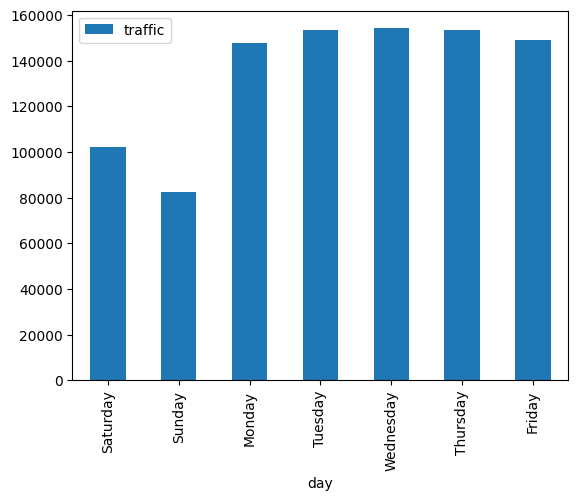

In [150]:
df_Test = df_station[df_station["station"] == "42 ST-PORT AUTH"]
df_Test
df_Test.plot.bar(x="day", y="traffic");

### Exercise

- What are the 3 busiest stations on average?
- What is the traffic distribution over the week?
- What are the busiest stations on weekends and on weekdays?

### Exercise

Write a script that imports each weekly file http://web.mta.info/developers/turnstile.html and merges them.

# Common issues

In [ ]:
xx = [2, 4, 6, '8']
df = pd.DataFrame(xx)
df.columns = ["X"]
df.head()

In [ ]:
df["Mult"] = 2.*df["X"]

In [ ]:
df.info()

In [ ]:
df['X'] = pd.to_numeric(df['X'])
df["Mult"] = 2.*df["X"]

In [ ]:
df.info()

In [ ]:
df.head()

### Working with copies

In [ ]:
N = 5
xx = np.random.standard_normal((N, 5))
df = pd.DataFrame(xx)
df2 = df ### same as df.copy(deep=False)
df3 = df.copy(deep=True)

In [ ]:
i,j = 0,1
df.iat[i,j] = 2.
print(df.iat[i,j], df2.iat[i,j])

# Extra: Combining DataFrames and creating signals

In [ ]:
aapl = pd.read_csv("data/apple.csv")
amzn = pd.read_csv("data/AMZN.csv")

In [ ]:
aapl.index = aapl["Date"]
del aapl["Date"]
aapl.tail()

In [ ]:
amzn.index = amzn["Date"]
del amzn["Date"]
amzn.tail()

In [ ]:
df = pd.merge(amzn, aapl, on="Date")
df.tail()

In [ ]:
df = pd.merge(amzn["Close"], aapl["Close"], on="Date")
df.columns = ["amzn", "aapl"]
df.head()

In [ ]:
df.plot();

#### Normalised versions...

In [ ]:
aapl0 = aapl.iloc[0,0]
amzn0 = amzn.iloc[0,0]

amzn_norm = amzn / amzn0
aapl_norm = aapl / aapl0
df_norm = pd.merge(amzn_norm["Close"], aapl_norm["Close"], on="Date")
df_norm.columns = ["amzn norm", "aapl norm"]
df_norm.plot();

In [ ]:
amzn["Returns"] = np.log(amzn['Close'] / amzn['Close'].shift(1))
amzn['MovingVol'] = amzn['Returns'].rolling(window=252).std() * np.sqrt(252.)
amzn = amzn[["Close", "Returns", "MovingVol"]]
amzn = amzn.dropna()
amzn["MovingVol"].plot(title="Moving vol");

In [ ]:
maxVolAllowed = 0.3
amzn.loc[amzn['MovingVol'] > maxVolAllowed, 'Signal'] = 0.6#coke["MovingVol"].max()
amzn[["Signal", "MovingVol"]].plot().legend(loc=3);

# WARNINGS: Data inconsistencies

- Missing data
- NaN, -1, ...
- Date format
- Blank spaces
- Formats: Int, float, ...